In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({'font.size' : 18})

In [5]:
SAVE_PRE = '../saves/'
save_paths = {
    'FedAvg'       : 'baselines/fed_avg',
    'Split-MS'     : 'baselines/sl_multi_server',
    'Split-SS'     : 'baselines/sl_single_server',
    'CSE-FSL'       : 'cifar-iid-K3U3E1BR5-200-241121-001549',
    #'FSL-SAGE (WS)' : 'cifar-iid-K3U3E1BR5-200-241121-011651',
    'FSL-SAGE (ours)'      : 'cifar-iid-K3U3E1BR5-200-241121-115013'
}
results_files = [
    'test_metrics',
    'test_metrics', 'test_metrics',
    'results', 'results', #'results'
]
def get_json_file(path):
    with open(path, 'r') as json_file:
        d = json.load(json_file)
    return d
    
save_dicts = {
    k:get_json_file(os.path.join(SAVE_PRE, v, f"{res_file}.json"))
    for res_file, (k, v) in zip(results_files, save_paths.items())
}
print(save_dicts)


{'FedAvg': {'test_loss': [1.9089005083977422, 1.4722590567190437, 1.2991824738587006, 1.211082930806317, 1.144423090204408, 1.070079190067098, 1.015586720237249, 0.9747296684904944, 0.9545806050300598, 0.9149901534937606, 0.8927884554561181, 0.8736509424221667, 0.849642471422123, 0.8322827348226234, 0.8167319939106326, 0.810319150550456, 0.7863152238387096, 0.7744832265226147, 0.7700860771951796, 0.7592365062689479, 0.7464464299286468, 0.7292378522172759, 0.7448680031148693, 0.7321089853214312, 0.7117222573938249, 0.7103236359131487, 0.6985872644412366, 0.7008422797993769, 0.6911118513421167, 0.6917542377604714, 0.6828060531163518, 0.6708852237538446, 0.6786103433446039, 0.6872852440876297, 0.6626045021075236, 0.6613540698455859, 0.660167649199691, 0.6525010689149929, 0.6537362125855458, 0.6525004396710214, 0.6518337424797348, 0.6342239104494264, 0.639580447085296, 0.6392046895962727, 0.6412484917459609, 0.6392243391350855, 0.6257544665396968, 0.6313442535038236, 0.6284616974335683, 0.

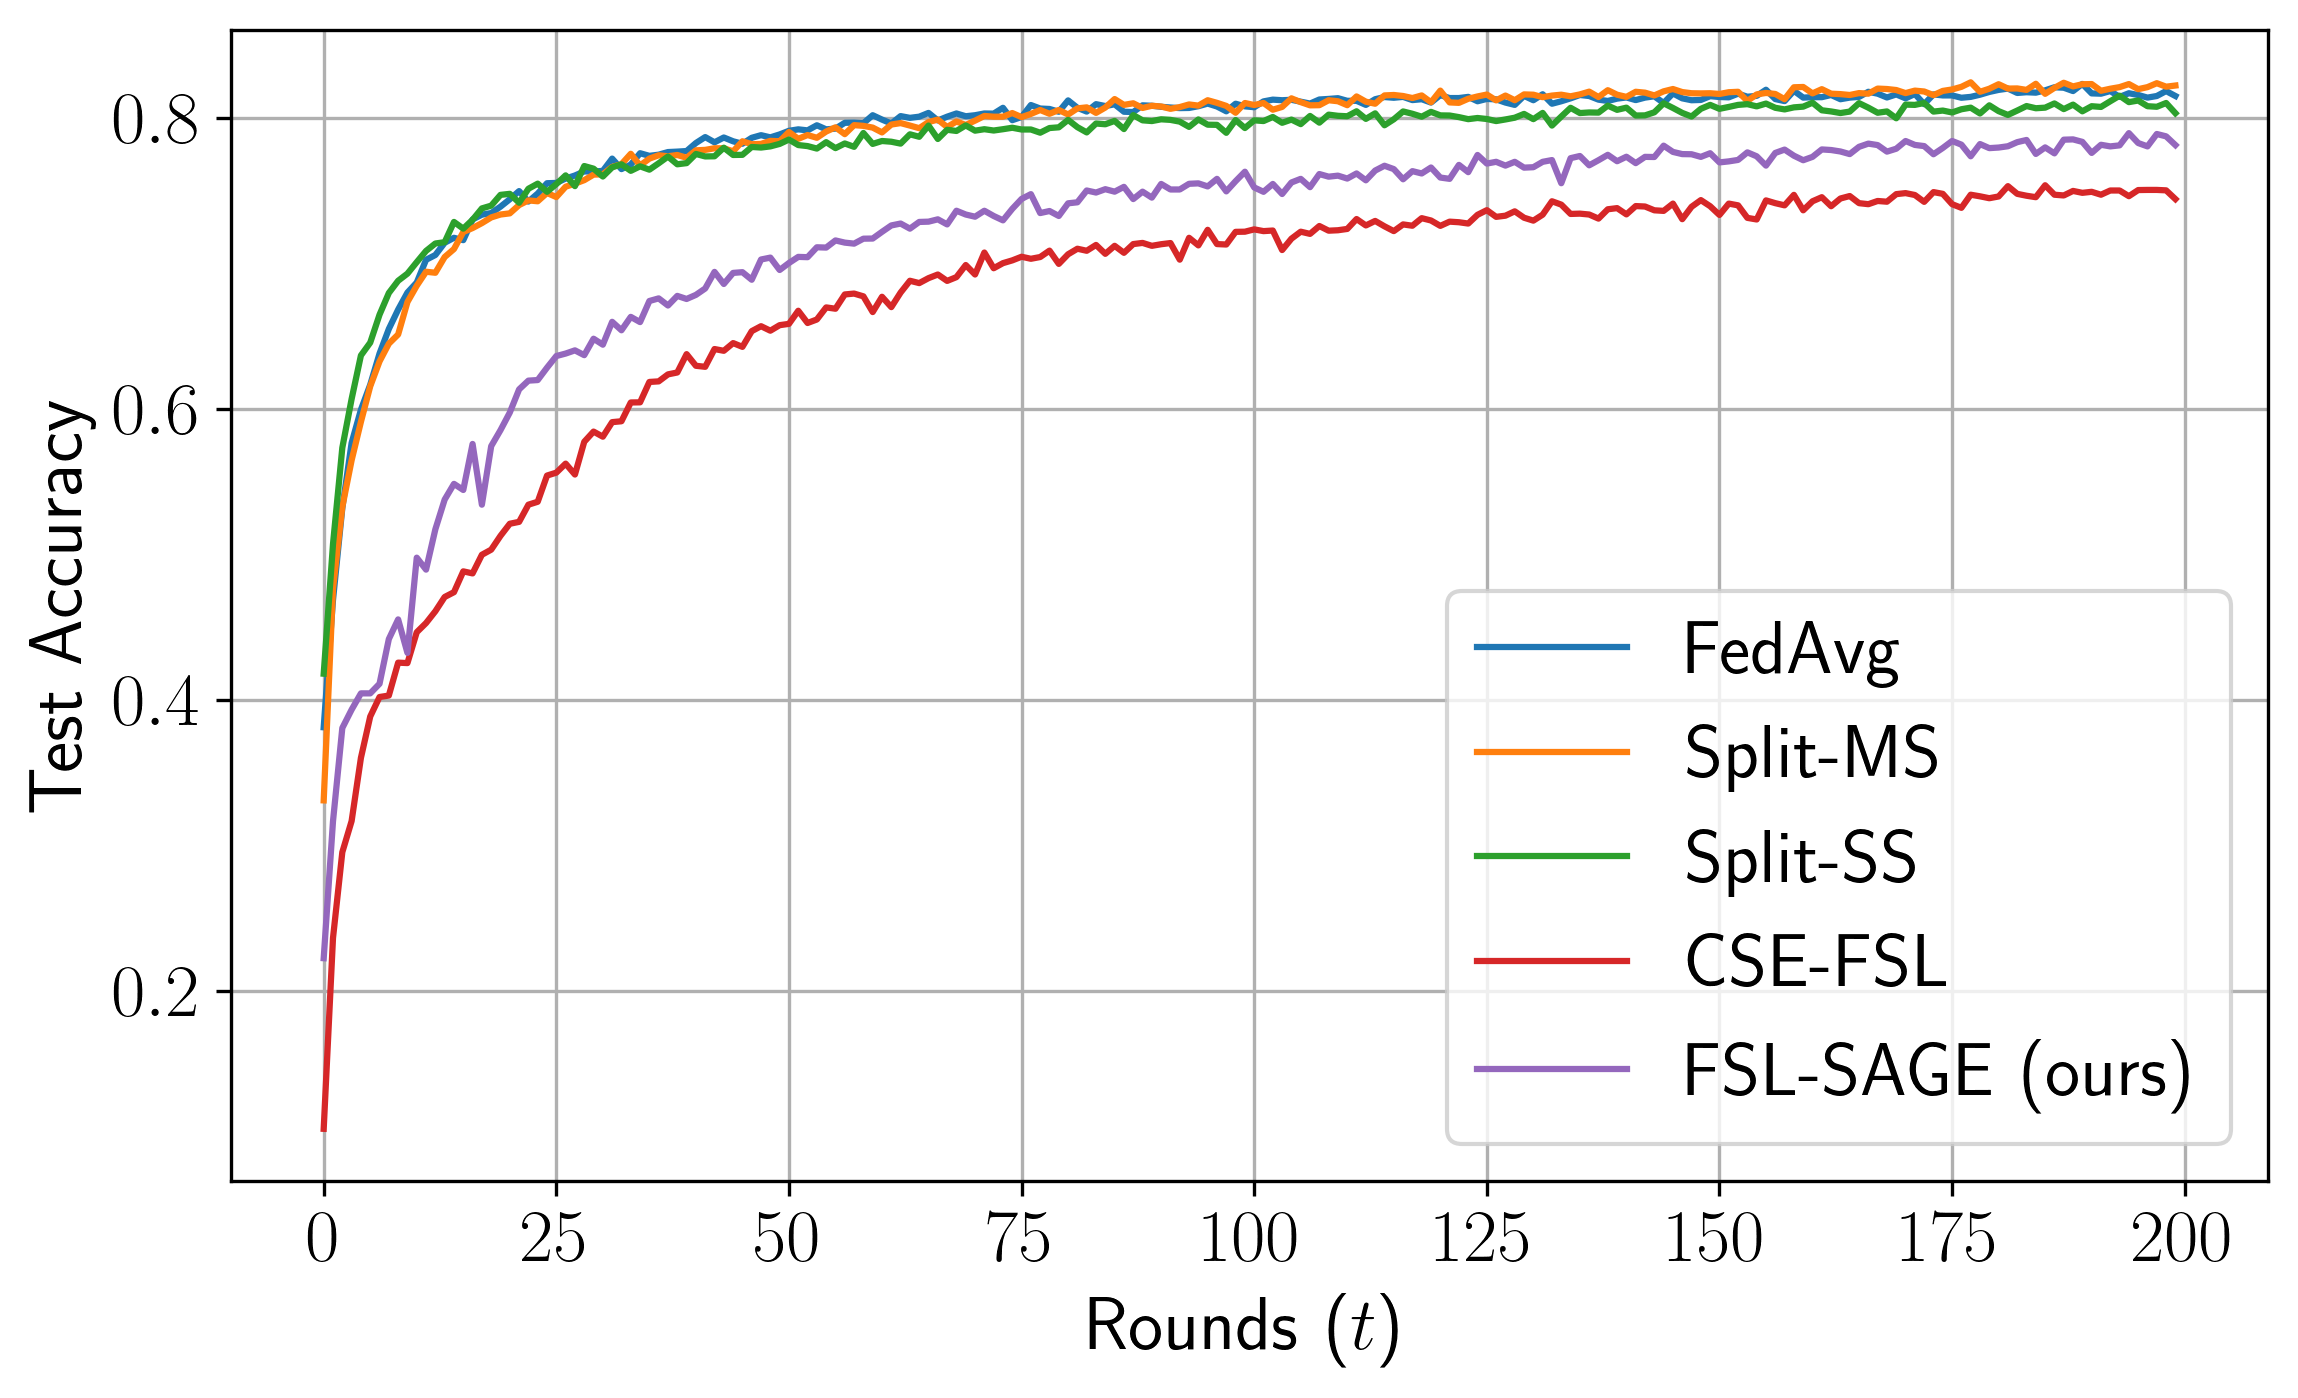

In [6]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5], dpi=300)
for k, v in save_dicts.items():
    ax.plot(v['test_acc'], label=k)

ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Rounds ($t$)")
ax.legend(loc='lower right')
ax.grid(True, which='both', axis='both')
plt.tight_layout()

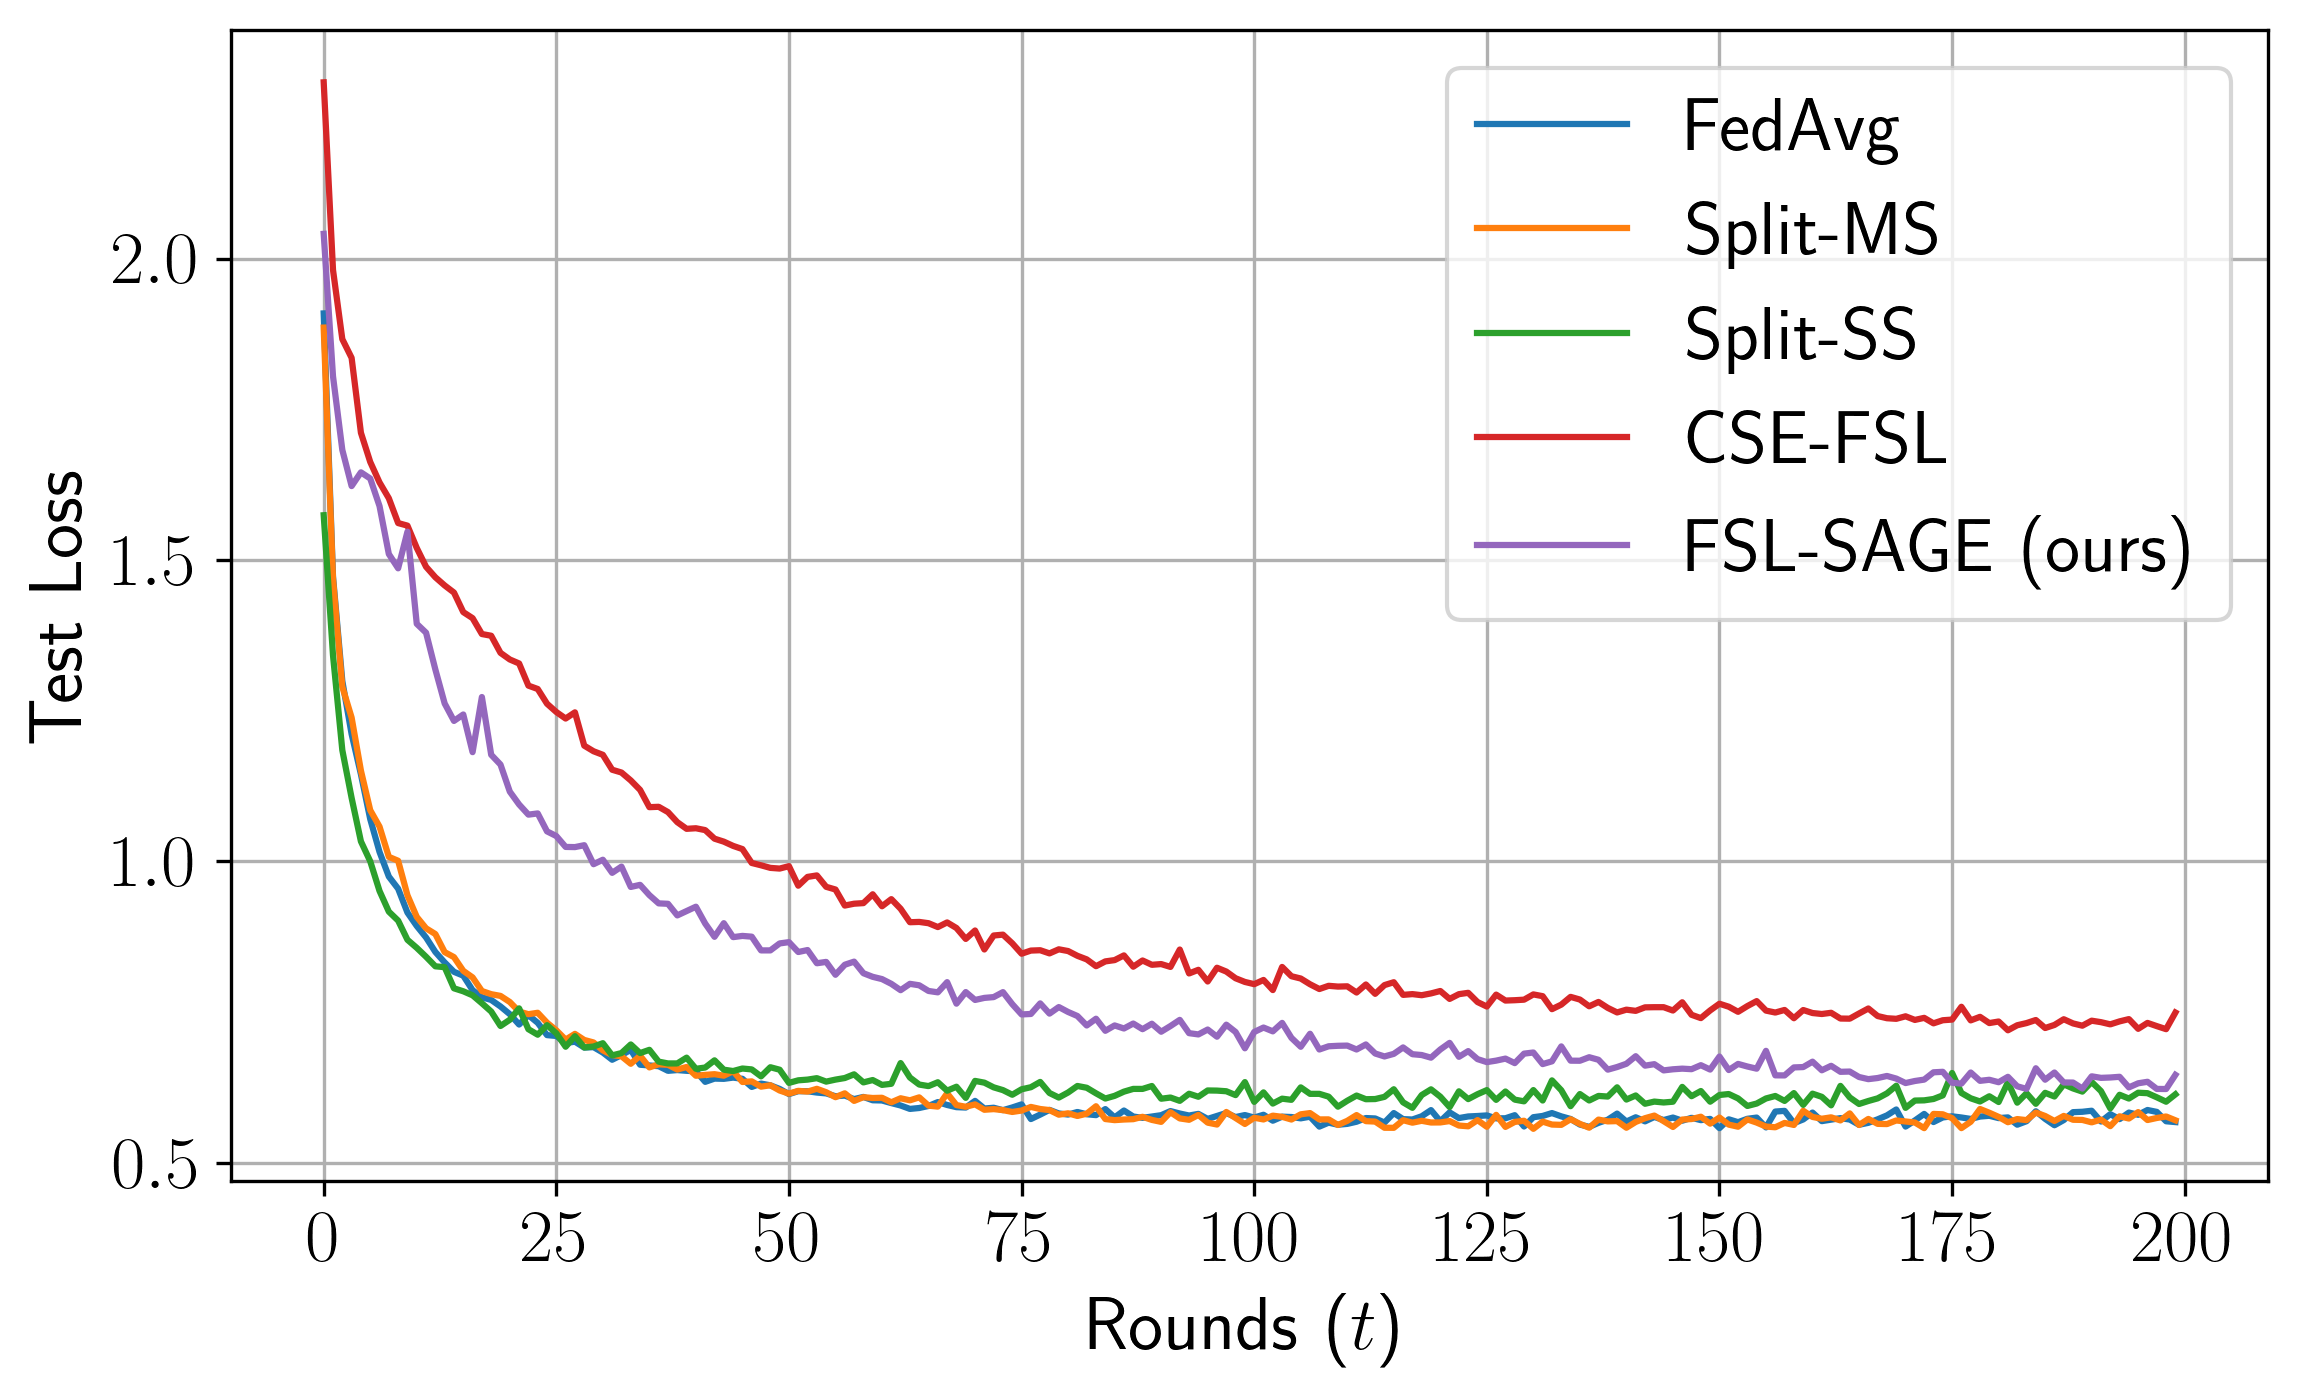

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5], dpi=300)
for k, v in save_dicts.items():
    ax.plot(v['test_loss'], label=k)

ax.set_ylabel("Test Loss")
ax.set_xlabel("Rounds ($t$)")
ax.legend(loc='upper right')
ax.grid(True, which='both', axis='both')
plt.tight_layout()